In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam

import datetime

In [44]:
# Train
size = 'demo'
type_ = 'train'

numpy_file_X_path = f'./files/numpy/X_{type_}_{size}.npy'
numpy_file_y_path = f'./files/numpy/y_{type_}_{size}.npy'

X_train = np.load(numpy_file_X_path)
y_train = np.load(numpy_file_y_path)

In [45]:
# Validation 
size = 'demo'
type_ = 'validation'

numpy_file_X_path = f'./files/numpy/X_{type_}_{size}.npy'
numpy_file_y_path = f'./files/numpy/y_{type_}_{size}.npy'

X_val = np.load(numpy_file_X_path)
y_val = np.load(numpy_file_y_path)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [46]:
# Use only the first 100 rows for testing
# X_train = X_train[:80]
# y_train = y_train[:80]
# X_val = X_val[:20]
# y_val = y_val[:20]

In [47]:
# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [64]:
model = Sequential([
    tf.keras.Input(shape=(X_val.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the first Dense layer
    Dense(128, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the second Dense layer
    Dense(32, activation='relu'),
    Dropout(0.2),  # Adding Dropout layer after the third Dense layer
    Dense(1, activation='linear')
])

# Define the optimizer with a specific learning rate
learning_rate = 1e-4
optimizer = Adam(learning_rate=learning_rate,clipnorm=1.0)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae', 'accuracy'])

# Summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               350464    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [65]:
# # Define the model
# model = Sequential([
#     tf.keras.Input(shape=(X_val.shape[1],)),
#     Dense(256, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the first Dense layer
#     Dense(128, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the second Dense layer
#     Dense(32, activation='relu'),
#     Dropout(0.2),  # Adding Dropout layer after the third Dense layer
#     Dense(1, activation='linear')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mse','mae', 'accuracy'])


In [66]:
X_train.shape

(19818, 1368)

In [67]:
X_val.shape

(20212, 1368)

In [68]:
y_train.shape

(19818,)

In [69]:
y_val.shape

(20212,)

In [70]:

# Prepare TensorBoard callback
log_dir = "files/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
num_epochs = 3
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=16,
                    validation_data=(X_val, y_val),
                    
                    callbacks=[tensorboard_callback, TqdmCallback(verbose=1),early_stop],
                    verbose=2)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/3
1239/1239 - 5s - loss: 240.6522 - mse: 240.6522 - mae: 11.9341 - accuracy: 3.0276e-04 - val_loss: nan - val_mse: nan - val_mae: nan - val_accuracy: 4.4528e-04
Epoch 2/3
1239/1239 - 4s - loss: 189.0410 - mse: 189.0410 - mae: 10.7587 - accuracy: 3.0276e-04 - val_loss: nan - val_mse: nan - val_mae: nan - val_accuracy: 4.4528e-04
Epoch 3/3
1239/1239 - 4s - loss: 182.4340 - mse: 182.4340 - mae: 10.5748 - accuracy: 3.0276e-04 - val_loss: nan - val_mse: nan - val_mae: nan - val_accuracy: 4.4528e-04


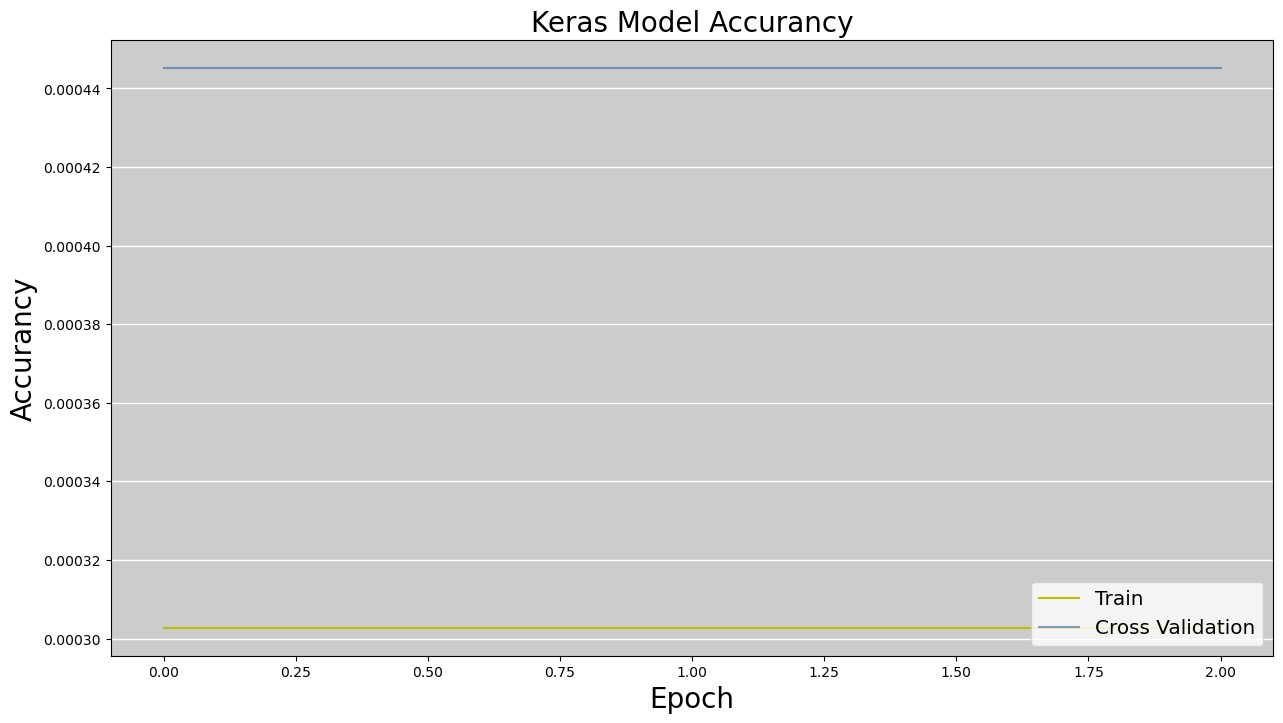

In [71]:
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'], color='y')
plt.plot(history.history['val_accuracy'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Accurancy',size=20)
plt.ylabel('Accurancy',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='lower right')
plt.show()

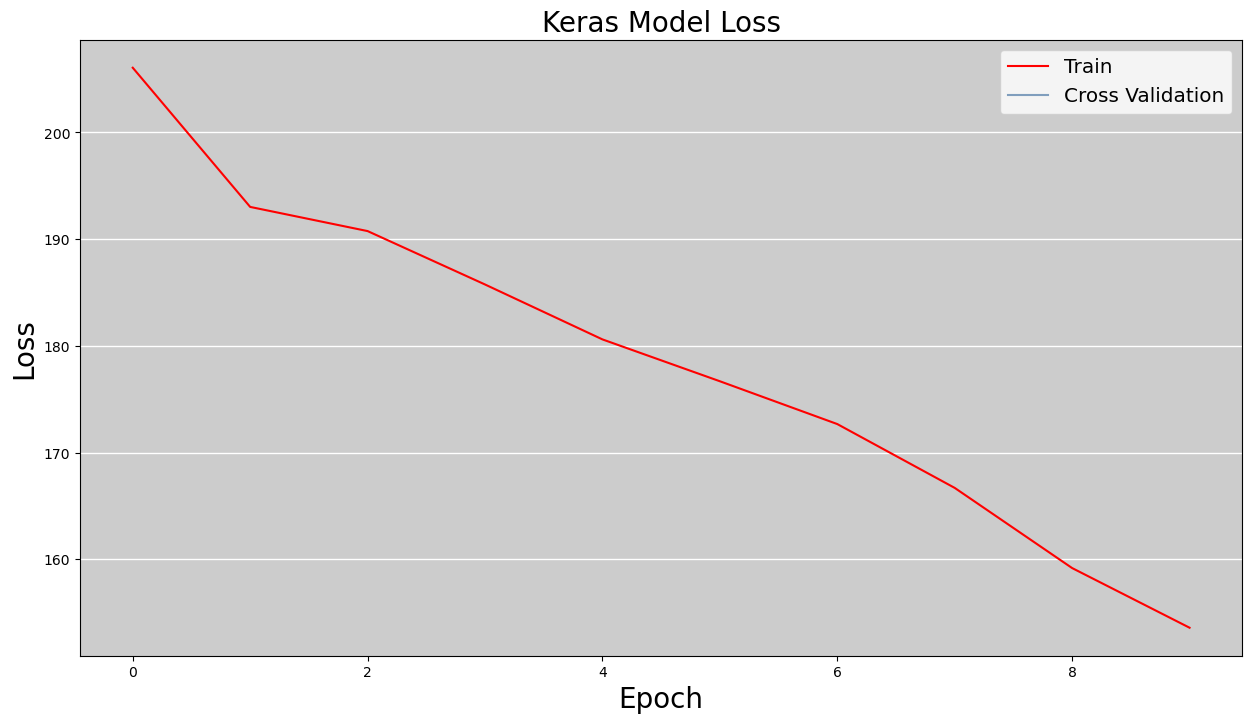

In [56]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('Keras Model Loss',size=20)
plt.ylabel('Loss',size=20)
plt.xlabel('Epoch',size=20)
plt.grid(True,axis='y', color='w', linestyle='-', linewidth=1)
plt.gca().patch.set_facecolor('0.8')
plt.legend(['Train', 'Cross Validation'],fontsize='x-large', loc='upper right')
plt.show()

In [28]:
# Evaluate the model
train_loss, train_mse,train_mae,train_acc = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_mse,test_mae,test_acc = model.evaluate(X_val, y_val, verbose=1)

632/632 [==============================] - 0s 611us/step - loss: 227.0024 - mse: 227.0024 - mae: 11.6662 - accuracy: 4.4528e-04


In [29]:
# Save the 
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_file_path = f'./files/models/model_{now}.h5py'
model.save(model_file_path)

INFO:tensorflow:Assets written to: ./files/models/model_20240708-215323.h5py\assets
